<a href="https://colab.research.google.com/github/kbdev20/sportanalitika_temalab/blob/main/sportanalitika_t%C3%A9malabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First steps with pandas & sk-learn

In [ ]:
import pandas as pd
train_df = pd.read_csv('https://drive.google.com/uc?id=1ob8uPLCba4Zbpdrvm90SWG89_Cvj9Rfi')
test_df = pd.read_csv('https://drive.google.com/uc?id=1xgr9iNkgooSgZXXmyAygqkFpZskZR67P')

print(train_df)
print(train_df)
# egy futball bajnoksag anonimizalt jatekosszintu boxscore adatai

# TODO: klaszterezesi feladat: besorolni a csapatokat (selectedPlayerTeam) felso-, kozep-, alsohazba a jatekosaik leirt aktivitasa alapjan
# TODO: regresszios feladat: golszerzesre (eventsNum_Goal) modellt epiteni
# TODO: osztalyozasi feladat: a jatekos posztjara (selectedPlayerPosition) modellt epiteni (termeszetesen nem lehet hasznalni a selectedPlayer valtozot)


      Unnamed: 0  awayTeam_id  eventsNum_Aerial  eventsNum_Attempt Saved  \
0             69        149.0               0.0                      0.0   
1             70        149.0               0.0                      0.0   
2             71        149.0               3.0                      0.0   
3             72        149.0               0.0                      0.0   
4             73        149.0               0.0                      0.0   
...          ...          ...               ...                      ...   
3244        3635        148.0               0.0                      0.0   
3245        3636        148.0               2.0                      1.0   
3246        3637        148.0               2.0                      0.0   
3247        3638        148.0               1.0                      0.0   
3248        3639        148.0               0.0                      0.0   

      eventsNum_Ball recovery  eventsNum_Claim  eventsNum_Clearance  \
0               

3249
391
3640


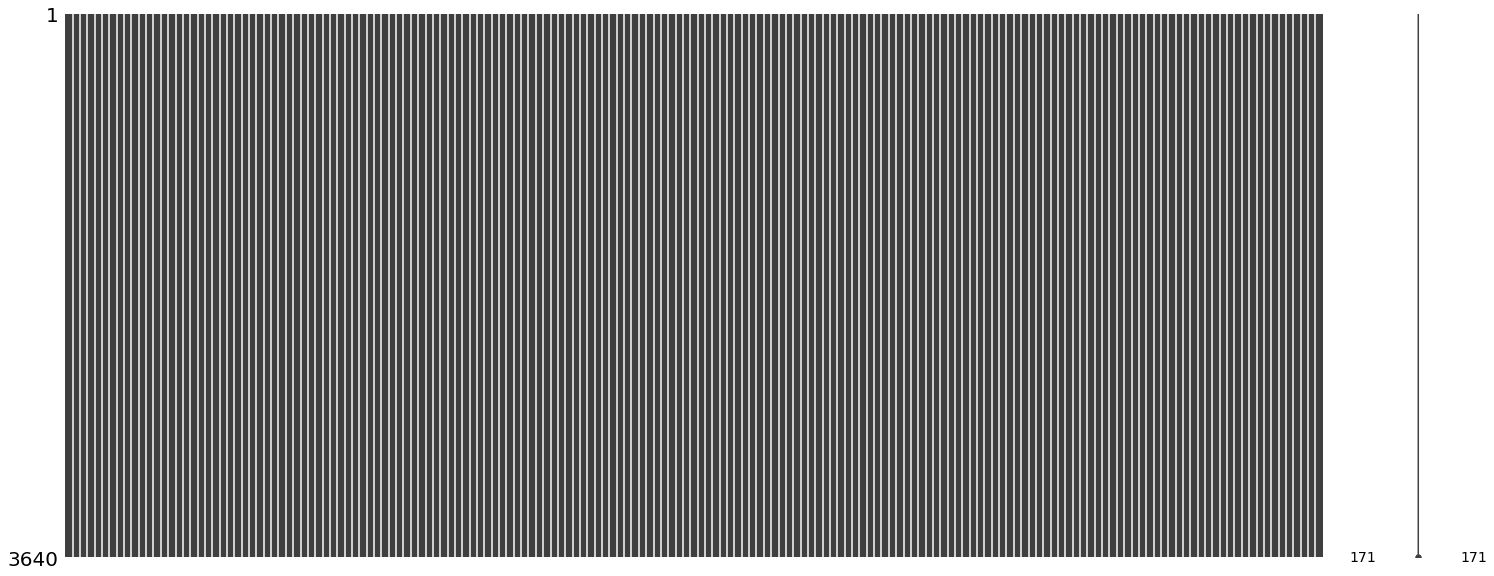

In [ ]:
#@title
#imputation
# TODO: osszeadni train & test seteket miutan megjegyzed hany rekord van bennuk a kesobbi splithez

#df_mean=test_df.copy()
import pandas as pd
import numpy as np


test_len=len(test_df)
train_len=len(train_df)
print(train_len)
print(test_len)

df_mean = pd.concat([test_df.assign(ind="test"), train_df.assign(ind="train")])

#import random
#def delete_random_elems(df_mean, 10):
  #to_delete= set(random.sample(range(len(df_mean)),n))
  #return [x for i, x in enumerate(df_mean) if not i in to_delete]

#megnéztem, hogy melyik oszlopban hány hiányzó adat van
#df_mean.isnull().sum()

#ugyanez, csak vizuálisan


df_mean.reset_index(drop= True, inplace= True)

df_mean.shape

#átlag imputation használata  számára
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
mean_imputer=SimpleImputer(strategy='mean')

for x in df_mean.columns.drop(["selectedPlayerPosition", "ind"]):
  df_mean[x]=mean_imputer.fit_transform(df_mean[x].values.reshape(-1,1)) # ;)

import missingno as msno
msno.matrix(df_mean)

sorted(df_mean.isnull().sum())
#print(df_mean.head(100))
print(len(df_mean))


In [ ]:
#feature selection
#TODO recursive feature elimination (class. regr.) based on a target feature 42 feat. -> 21 feat.
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
        #test és train egybefűzése:
        #selection_df = pd.concat([test_df.assign(ind="test"), train_df.assign(ind="train")])
selection_df = df_mean  # ezt irtam hozza: pipeline része így
print("Eredeti dataframe oszlopainak száma:")
print(len(selection_df.columns))
print("Eredeti adatok alapján korrelációs heatmap:")
# plt.figure(figsize=(27,24))
# sns.heatmap(selection_df.corr(), annot=False, cmap=plt.cm.Reds)
# plt.show()

#remove features between a certain variance (sklearn helyett új implementáció):
var = selection_df.agg("var", numeric_only=True)
selection_df = selection_df.drop(columns=var[var.between(0, 0.1)].index)

#végigmegyünk a dataframe oszlopain,
# és törlünk minden oszlopot,
# ahol 3 vagy több másik oszloppal 0,55-nél nagyobb a korreláció:
for idx, row in selection_df.corr().iterrows():
    corr_too_high_count = 0
    for korr in row.values:
      if (korr > 0.55): corr_too_high_count += 1
    if (corr_too_high_count >= 3):
       selection_df = selection_df.drop(row.name, axis=1)

#kiveszünk minden oszlopot, aminek a nevében "_id" szerepel:
selection_df = selection_df[selection_df.columns.drop(selection_df.filter(regex='_id').columns)]

print("Új dataframe oszlopainak száma:")
print(len(selection_df.columns))
print("Új heatmap, kivett változókkal:")
# plt.figure(figsize=(23,19))
# sns.heatmap(selection_df.corr(), annot=True, cmap=plt.cm.Greens)
# plt.show()

      #print("Legkisebb korrelációval rendelkező változók az eventsNum_Goal változóra (rendezve):")
      #print(selection_df.corr()["eventsNum_Goal"].reindex(selection_df.corr()["eventsNum_Goal"].abs().sort_values().index))
#test és train szétválasztása
sel_test = selection_df[selection_df["ind"].eq("test")].drop("ind", axis=1)
sel_train = selection_df[selection_df["ind"].eq("train")].drop("ind", axis=1)

selection_df.head(5)
#Initializing RFE model
from sklearn.linear_model import LinearRegression
"""
model = LinearRegression()
rfe = RFE(model, n_features_to_select=21)
#Transforming data using RFE
y = selection_df["eventsNum_Goal"]
X = selection_df.drop(["eventsNum_Goal","ind","selectedPlayerPosition"], axis=1)
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
for i in X.size:
  print(column)
print(rfe.ranking_)
"""

Eredeti dataframe oszlopainak száma:
171
Eredeti adatok alapján korrelációs heatmap:
Új dataframe oszlopainak száma:
42
Új heatmap, kivett változókkal:


'\nmodel = LinearRegression()\nrfe = RFE(model, n_features_to_select=21)\n#Transforming data using RFE\ny = selection_df["eventsNum_Goal"]\nX = selection_df.drop(["eventsNum_Goal","ind","selectedPlayerPosition"], axis=1)\nX_rfe = rfe.fit_transform(X,y) \n#Fitting the data to model\nmodel.fit(X_rfe,y)\nprint(rfe.support_)\nfor i in X.size:\n  print(column)\nprint(rfe.ranking_)\n'

In [ ]:
#normalization
# normalizacio utana splitteld a feljegyzett sornal train-re es test-re

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing

print("DF hossza:")
print(len(selection_df))
print("------------")
print("test hossza:")
print(len(sel_test))
print("train hossza:")
print(len(sel_train))
print("------------")

#kategorikus oszlopok kiirasa
categoric_columns = []
print("Selection df nem numerikus oszlopai: ")
for columns in selection_df:
    if is_string_dtype(selection_df[columns]):
      print(columns)

print("------------")
#kategorikus oszlopok masolasa majd torlese
selection_df_categoric = selection_df[['selectedPlayerPosition', 'ind']].copy()
print(selection_df_categoric)
selection_df_COPY = selection_df.drop(columns=['selectedPlayerPosition', 'ind'])

min_max_scaler = preprocessing.MinMaxScaler()
#Fuggveny normalizalashoz
def scaleColumns(df):
    for col in df:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


#Normalizáló fuggveny alkalmazasa
selection_df_COPY = scaleColumns(selection_df_COPY)
print("------------")
print("------------")
#Kivágott kategorikus oszlopok visszacsatolása
selection_df_COPY = pd.concat([selection_df_COPY, selection_df_categoric], axis=1)
print(selection_df_COPY)
print("------------")
print("------------")

#Normalizalt adatok szétvágása a megfelelő ponton.

#ITT A NORMALIZALT TEST
normalized_test_df = selection_df_COPY.iloc[:391,:]
#ITT A NORMALIZALT TRAIN
normalized_train_df = selection_df_COPY.iloc[391:,:]

print("test hossza:")
print(len(normalized_test_df))
print("train hossza:")
print(len(normalized_train_df))





DF hossza:
3640
------------
test hossza:
391
train hossza:
3249
------------
Selection df nem numerikus oszlopai: 
selectedPlayerPosition
ind
------------
     selectedPlayerPosition    ind
0                Goalkeeper   test
1                  Defender   test
2                  Defender   test
3                  Defender   test
4                Midfielder   test
...                     ...    ...
3635             Goalkeeper  train
3636               Defender  train
3637               Defender  train
3638             Midfielder  train
3639                Forward  train

[3640 rows x 2 columns]
------------
------------
      Unnamed: 0  eventsNum_Aerial  eventsNum_Attempt Saved  \
0       0.000000          0.000000                      0.0   
1       0.000275          0.090909                      0.0   
2       0.000550          0.136364                      0.0   
3       0.000824          0.045455                      0.0   
4       0.001099          0.272727                      0.

Decision tree:
{'criterion': 'gini', 'max_depth': 7}
DecisionTreeClassifier(max_depth=7)
0.7903980087708902
{'mean_fit_time': array([0.01038876, 0.01065927, 0.01139841, 0.01326637, 0.0159337 ,
       0.01776724, 0.02389979, 0.02352748, 0.02597446, 0.00869994,
       0.01089764, 0.01737461, 0.04047213, 0.03582926, 0.03803959,
       0.04859123, 0.06073513, 0.05061111]), 'std_fit_time': array([0.00365059, 0.00311389, 0.00027441, 0.00014886, 0.00031774,
       0.00010111, 0.00531449, 0.00229691, 0.0024435 , 0.00108158,
       0.00017659, 0.00504169, 0.01951441, 0.00347007, 0.00346622,
       0.01568522, 0.01524462, 0.00568118]), 'mean_score_time': array([0.0029511 , 0.0025353 , 0.00247722, 0.00252337, 0.00263777,
       0.00262637, 0.00272584, 0.00275097, 0.00299644, 0.00296278,
       0.00263801, 0.00406766, 0.0066987 , 0.00439138, 0.00532966,
       0.0054132 , 0.00875607, 0.00930629]), 'std_score_time': array([1.16465509e-03, 3.01019575e-04, 8.79098671e-05, 5.68871726e-05,
       1.063

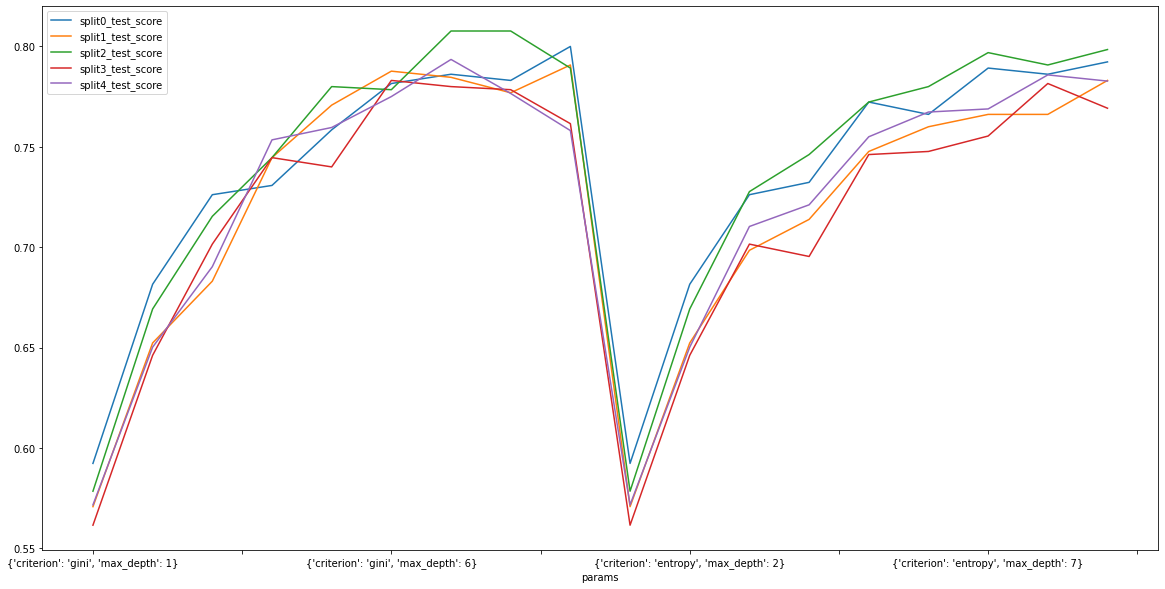

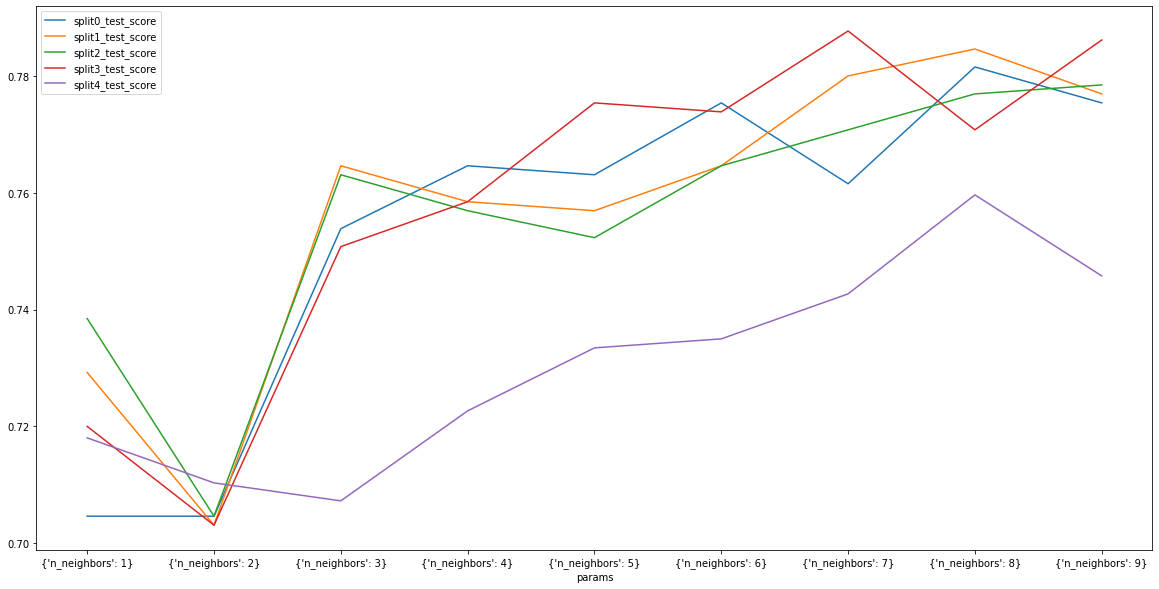

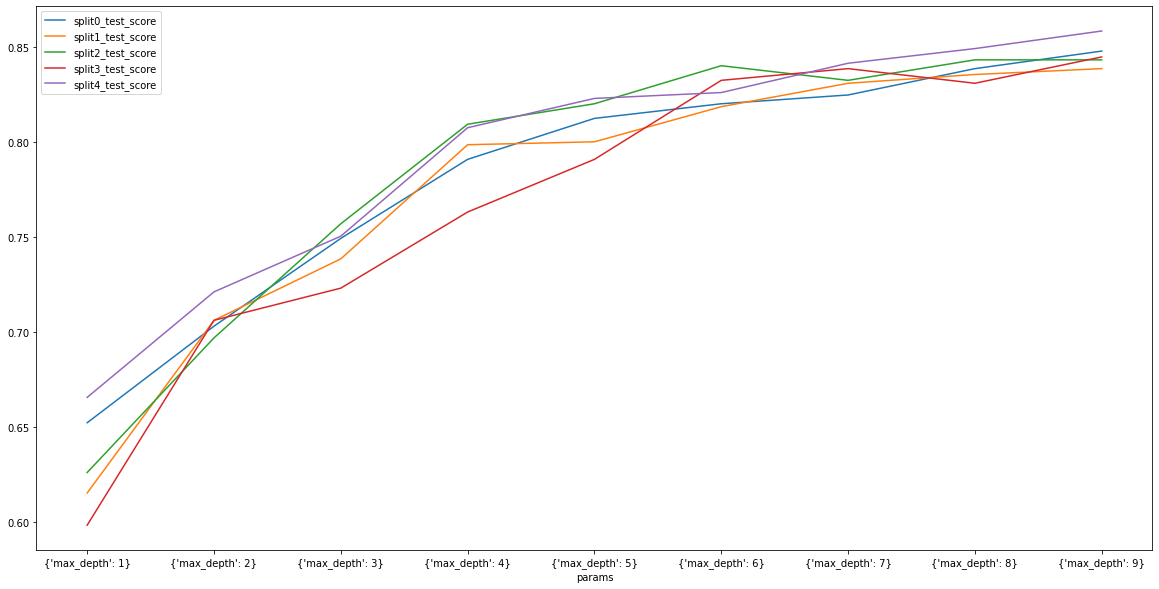

In [ ]:
#classification
# TODO: hyperparameter search, gridsearch beepitett fuggveny

from sklearn.model_selection import GridSearchCV

#Decision Tree
print('Decision tree:')
from sklearn import tree
X = normalized_train_df.drop(['selectedPlayer', 'selectedPlayerPosition','ind'], axis = 1)
y = normalized_train_df['selectedPlayerPosition']
clf_dt = tree.DecisionTreeClassifier()
#clf_dt = clf_dt.fit(X, y)
#tree.plot_tree(clf_dt)

param_dict = {"criterion":['gini', 'entropy'],
              "max_depth": range(1,10)}
clf_dt_GS = GridSearchCV(clf_dt,
                      param_grid=param_dict)

clf_dt_GS.fit(X,y)
print(clf_dt_GS.best_params_)
print(clf_dt_GS.best_estimator_)
print(clf_dt_GS.best_score_)
print(clf_dt_GS.cv_results_)

df_dt = pd.DataFrame(clf_dt_GS.cv_results_)
print(df_dt.head)
df_dt.plot(x="params", y=["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"], kind="line", figsize=(20, 10))




#KNN
print('')
print('KNNeighbors:')
X = normalized_train_df.drop(['selectedPlayer', 'selectedPlayerPosition','ind'], axis = 1)
y = normalized_train_df['selectedPlayerPosition']
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
#clf_knn.fit(X, y)

param_dict = {"n_neighbors": range(1,10)}
clf_knn_GS = GridSearchCV(clf_knn,
                      param_grid=param_dict)

clf_knn_GS.fit(X,y)
print(clf_knn_GS.best_params_)
print(clf_knn_GS.best_estimator_)
print(clf_knn_GS.best_score_)
print(clf_knn_GS.cv_results_)

df_knn = pd.DataFrame(clf_knn_GS.cv_results_)
print(df_knn.head)
df_knn.plot(x="params", y=["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"], kind="line", figsize=(20, 10))



#Random Forest
print('')
print('Random forest:')
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X = normalized_train_df.drop(['selectedPlayer', 'selectedPlayerPosition','ind'], axis = 1)
y = normalized_train_df['selectedPlayerPosition']
clf_rf = RandomForestClassifier(max_depth=2)
#clf_rf.fit(X, y)

param_dict = {"max_depth": range(1,10)}
clf_rf_GS = GridSearchCV(clf_rf,
                      param_grid=param_dict,
                      n_jobs=-1)

clf_rf_GS.fit(X,y)
print(clf_rf_GS.best_params_)
print(clf_rf_GS.best_estimator_)
print(clf_rf_GS.best_score_)
print(clf_rf_GS.cv_results_)

df_rf = pd.DataFrame(clf_rf_GS.cv_results_)
print(df_rf.head)
df_rf.plot(x="params", y=["split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score"], kind="line", figsize=(20, 10))

Training score:  0.07277266931606197
r2 score:  0.048965438856716004
Testing score:  0.048965438856716004
mean_sqrd_error:  0.007458532746815793


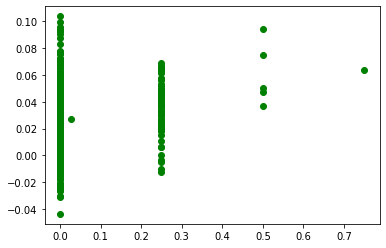

Best parameters LASSO:  {'alpha': 1e-05}
Best cross-validation score LASSO:  0.047862458363768276
Lasso training score:  0.07260695733992051
Lasso testing score:  0.0515138881249293
LASSO mean_sqrd_error:  0.007438546414986045


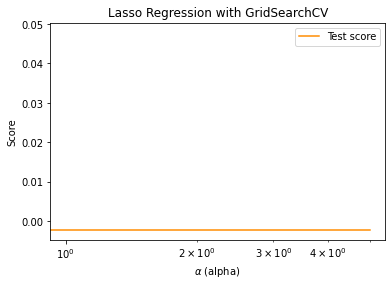

Ridge training score:  0.06955400685318003
Best parameters RIDGE:  {'alpha': 10.0}
Best cross-validation score RIDGE:  {'alpha': 10.0}
Ridge testing score:  0.0569602089826009
Ridge mean_sqrd_error:  0.007395833390532154


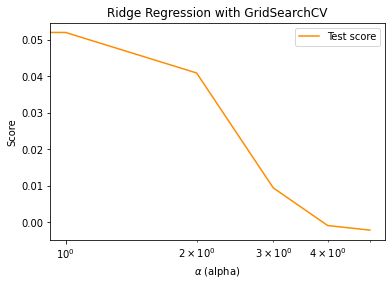

In [ ]:
#regression
# TODO: hyperparameter search az overfitting elkerulesere (train score legyen hasonlo a test scorehoz)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV

#train_df = pd.read_csv('https://drive.google.com/uc?id=1ob8uPLCba4Zbpdrvm90SWG89_Cvj9Rfi')
#test_df = pd.read_csv('https://drive.google.com/uc?id=1xgr9iNkgooSgZXXmyAygqkFpZskZR67P')


x = normalized_train_df.drop(["eventsNum_Goal", 'selectedPlayerPosition', 'ind'], axis=1)
y = normalized_train_df["eventsNum_Goal"]

#print(x.head(10))

# Splitting the data into traing and testing data
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state=42)

#Linear Regression
regLin = linear_model.LinearRegression()

#Training
regLin.fit(x_train, y_train)
print("Training score: ", regLin.score(x_train, y_train))

# Predict
y_pred_lin = regLin.predict(x_test)
#print(y_pred_lin)
# predicting the accuracy score
score = r2_score(y_test,y_pred_lin)
print('r2 score: ',score)
print("Testing score: ", regLin.score(x_test, y_test))
print('mean_sqrd_error: ',mean_squared_error(y_test,y_pred_lin))

plt.scatter(y_test, y_pred_lin, color='g')
#plt.plot(x_test, y_pred_lin,color='k')
plt.show()

#---------------------------------------------------------------------------------------

# Defining grid of candidate alpha values (powers of 10, from 0.00001 to 1000000)
param_grid = {"alpha": 10.0 ** np.arange(-5, 6)}
alphas = np.arange(-5, 6)

# Lasso model -> hyperparameter alpha = ToBeDetermined
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid)
# Fit the Lasso model
grid_search_lasso.fit(x_train, y_train)
# Best parameters
print("Best parameters LASSO: ", grid_search_lasso.best_params_)
# Best cross-validation score
print("Best cross-validation score LASSO: ", grid_search_lasso.best_score_)

print("Lasso training score: ", grid_search_lasso.score(x_train, y_train))

# Predict
y_pred_lasso = grid_search_lasso.predict(x_test)
#print(y_pred_lasso)

print("Lasso testing score: ", r2_score(y_test, y_pred_lasso))
print('LASSO mean_sqrd_error: ',mean_squared_error(y_test,y_pred_lasso))

#print(grid_search_lasso.cv_results_.keys())

test_scores_lasso = grid_search_lasso.cv_results_["mean_test_score"]
#test_scores_lasso = grid_search_lasso.cv_results_["test_scores_lasso"]


plt.figure()
plt.title('Lasso Regression with GridSearchCV')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, test_scores_lasso, label='Test score', color='darkorange')
plt.legend(loc='best')
plt.show()

# #LassoCV Lasso-hoz
# model = LassoCV(cv=5, random_state=0, max_iter=10000)
# model.fit(x_train, y_train)
# LassoCV(cv=5, max_iter=10000, random_state=0)
# print(model.alpha_)

# lasso_best = Lasso(alpha=model.alpha_)
# lasso_best.fit(x_train, y_train)
# print("LassoCV training score : ", lasso_best.score(x_train, y_train))

# y_pred_lassoCV = lasso_best.predict(x_test)
# print("LassoCV testing score : ", lasso_best.score(x_test, y_test))
# print('LassoCV mean_sqrd_error is: ',mean_squared_error(y_test,y_pred_lassoCV))



#---------------------------------------------------------------------------------------

# Ridge model -> hyperparameter alpha = ToBeDetermined
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid)

# Prepare input data
grid_search_ridge.fit(x_train, y_train)
print("Ridge training score: ", grid_search_ridge.score(x_train, y_train))

# Best parameters
print("Best parameters RIDGE: ", grid_search_ridge.best_params_)
grid_search_ridge.best_estimator_
# Best cross-validation score
grid_search_ridge.best_score_
print("Best cross-validation score RIDGE: ", grid_search_ridge.best_params_)

# Predict
y_pred_ridge = grid_search_ridge.predict(x_test)
#grid_search_ridge.predict(X)
print("Ridge testing score: ", r2_score(y_test, y_pred_ridge))
print('Ridge mean_sqrd_error: ',mean_squared_error(y_test,y_pred_ridge))

#ridge.coef_
test_scores_ridge = grid_search_ridge.cv_results_["mean_test_score"]
# train_scores_ridge = grid_search_ridge.cv_results_["train_score_ridge"]
# test_scores_ridge = grid_search_ridge.cv_results_["test_score_ridge"]

plt.figure()
plt.title('Ridge Regression with GridSearchCV')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
#plt.semilogx(alphas, train_scores_ridge, label='Train score', color='navy')
plt.semilogx(alphas, test_scores_ridge, label='Test score', color='darkorange')
plt.legend(loc='best')
plt.show()



In [ ]:
from pyparsing.helpers import withClass
#k-means clustering
#TODO: PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) - 2/3 dimenzio -> plot
#TODO: tavolsag metrikak, elbow method (kmeans-t kulonbozo k-kra lefuttatod), silhouette score
# TODO: klaszterezesi feladat: besorolni a csapatokat (selectedPlayerTeam) felso-, kozep-, alsohazba a jatekosaik leirt aktivitasa alapjan
#TODO: group by csapat kb 20 csapatban levo jatekosok alapjan clusterezes elott gropby pandasos fuggvenyekkel ez eleg gyors mint sql gólok passzok sum  pca feature importance

#imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



cluster_df = sel_test
cluster_df = cluster_df.drop(columns="selectedPlayerPosition") #dummify

for i in cluster_df.columns:
  print(i)

#feature_df = cluster_df.drop(columns=['selectedPlayerTeam','selectedPlayer'])

cluster_df['sumofplayer'] = cluster_df.groupby('selectedPlayerTeam')['selectedPlayer'].sum()
#cluster_df['sumofplayer']= mean_imputer.fit_transform(cluster_df['sumofplayer'].values.reshape(-1,1))
#cluster_df = cluster_df.groupby('selectedPlayerTeam',as_index=False)['selectedPlayer']

pca = PCA(n_components=2)
pca.fit(cluster_df)
scores_pca = pca.transform(cluster_df)




# elbow method
wcss = []
for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca) #scores_pca
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1,30),wcss,marker = 'o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.title("K-means with PCA Clustering elbow")
plt.show()

# kmeans clustering to 3 clusters
kmeans_pca = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

# crating new dataframe with original and pca results and clusters
df_segm_pca_kmeans = pd.concat([cluster_df,pd.DataFrame(scores_pca)],axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component1','Component2','Component3']
df_segm_pca_kmeans['segment K-means PCA'] = kmeans_pca.labels_
#print(df_segm_pca_kmeans.head())

df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['segment K-means PCA'].map({0:'felso',1:'kozep',2:'also'})

x_axis = df_segm_pca_kmeans['Component2']
y_axis = df_segm_pca_kmeans['Component1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Segment'])
plt.title('Clusters by pca compontents')
plt.show()

##cluster_df = clean_dataset(cluster_df)
##cluster_df = cluster_df.fillna(0)
#cluser_df = cluster_df.dropna()


clt = KMeans(n_clusters=3)

clusters = pd.DataFrame(clt.fit_predict(cluster_df))
cluster_df["Cluster"] = clusters

"""
#vizualizáció
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(cluster_df.selectedPlayerTeam,cluster_df.selectedPlayer, c=cluster_df["Cluster"],s=50)
#, c=train_df["Cluster"]
ax.set_title("KMeans Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()
"""

Unnamed: 0
eventsNum_Aerial
eventsNum_Attempt Saved
eventsNum_Clearance
eventsNum_Goal
eventsNum_Interception
eventsNum_Keeper Sweeper
eventsNum_Miss
eventsNum_Out
passAngleBinNum_(-0.1, 0.262]
passAngleBinNum_(1.571, 2.88]
passAngleBinNum_(2.88, 3.403]
passAngleBinNum_(6.021, 6.283]
passDirectionNum_Back->Center
passDirectionNum_Back->Left
passDirectionNum_Back->Right
passDirectionNum_Back_Center->Back
passDirectionNum_Back_Center->Left
passDirectionNum_Back_Center->Right
passDirectionNum_Back_Left->Back
passDirectionNum_Back_Left->Right
passDirectionNum_Back_Right->Back
passDirectionNum_Back_Right->Left
passDirectionNum_Center->Back
passDirectionNum_Center->Left
passDirectionNum_Center->Right
passDirectionNum_Front->Center
passDirectionNum_Front->Left
passDirectionNum_Front->Right
passDirectionNum_Left->Back
passDirectionNum_Left->Center
passDirectionNum_Right->Back
passLenBinNum_(0, 5]
passLenBinNum_(30, 40]
passNumFrom_Back_Left
passNumFrom_Back_Right
passNumFrom_Front
passNumFrom_

ValueError: ignored

In [ ]:
#clustering

#imports
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import pandas as pd
train_df = pd.read_csv("sample_data/california_housing_train.csv")
test_df = pd.read_csv("sample_data/california_housing_test.csv")
#print(train_df.head(5))
#print(test_df.head(5))
train_df.describe()
#train_df.isna().sum()



#sztenderdizálás és outlierek kiszűrése. sztenderdizálás: az átlag = 0 és a szórás = 1
std_slc = StandardScaler()
X_std = std_slc.fit_transform(train_df)

#dbscan használata
clt = DBSCAN()
#model = clt.fit(X_std)
clusters = pd.DataFrame(clt.fit_predict(X_std))
train_df["Cluster"] = clusters

print(train_df.iloc[0])


#vizualizáció
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(train_df.latitude,train_df.longitude, c=train_df["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

In [ ]:
#evaluation

#regressziós modellek kiértékelése

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Lineáris regresszió

print("Linear regression")
#átlagos hiba
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_lin))
#mean_squared_error ->átlagos négyzetes hiba
print("Mean squared error : ", mean_squared_error(y_test, y_pred_lin))
#root_mean_squared_error ->átlagos négyzetes hiba gyök alatt
print("Root mean squared error : ", mean_squared_error(y_test, y_pred_lin, squared=False))
#r^2 score -> hiba / valódi értékek átlagtól való eltérése, szummázva
print("R^2 score : ", r2_score(y_test, y_pred_lin))

#Lasso regresszió
y_pred_lasso = lasso.predict(x_test)

print("\nLasso regression")
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_lasso))
print("Mean squared error : ", mean_squared_error(y_test, y_pred_lasso))
print("Root mean squared error : ", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("R^2 score : ", r2_score(y_test, y_pred_lasso))

#Gradient boosting regresszió

#print("\nGradient boosting regression")
#print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_gradient))
#print("Mean squared error : ", mean_squared_error(y_test, y_pred_gradient))
#print("Root mean squared error : ", mean_squared_error(y_test, y_pred_gradient, squared=False))
#print("R^2 score : ", r2_score(y_test, y_pred_gradient))

#Random forest regresszió
#y_pred_rforest = random_search.predict(x_test)

#print("\nRandom forest regression")
#print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_rforest))
#print("Mean squared error : ", mean_squared_error(y_test, y_pred_rforest))
#print("Root mean squared error : ", mean_squared_error(y_test, y_pred_rforest, squared=False))
#print("R^2 score : ", r2_score(y_test, y_pred_rforest))

#Ridge regresszió
print("\nRidge regression")
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred_ridge))
print("Mean squared error : ", mean_squared_error(y_test, y_pred_ridge))
print("Root mean squared error : ", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("R^2 score : ", r2_score(y_test, y_pred_ridge))


#Klasszifikációs modellek kiértékelése

#Teszt dataframe elkészítése (magyarázó- és célváltozók)
#test_cl=test_df.copy()

x_test_cl = normalized_test_df.drop(['selectedPlayer', 'selectedPlayerPosition'], axis = 1)
y_test_cl = normalized_test_df['selectedPlayerPosition']


#Decision Tree classification
print("\nDecision Tree classification")
pred_cl_dt=clf_dt_GS.predict(x_test_cl)

#Confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_cl, pred_cl_dt))

#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test_cl, pred_cl_dt))

#F1-score
from sklearn.metrics import f1_score
#average=micro azt jelenti, hogy az összes true_pos, false_n, false_pos összeadódik, és így értékelődik ki
print("F1-score: ", f1_score(y_test_cl, pred_cl_dt, average = 'micro'))
print("F1-score (macro): ", f1_score(y_test_cl, pred_cl_dt, average = 'macro'))

#ROC-AUC
from sklearn.metrics import roc_auc_score
#ovr: One vs Rest, ovo: One vs One
print("ROC-AUC: ", roc_auc_score(y_test_cl, clf_dt.predict_proba(x_test_cl), multi_class='ovr'))
print("ROC-AUC (ovo): ", roc_auc_score(y_test_cl, clf_dt.predict_proba(x_test_cl), multi_class='ovo'))

#KNN classification
print("\nKNN classification")
pred_cl_knn=clf_knn_GS.predict(x_test_cl)

print("Confusion Matrix:\n", confusion_matrix(y_test_cl, pred_cl_knn))
print("Accuracy: ", accuracy_score(y_test_cl, pred_cl_knn))
print("F1-score: ", f1_score(y_test_cl, pred_cl_knn, average = 'micro'))
print("ROC-AUC: ", roc_auc_score(y_test_cl, clf_knn_GS.predict_proba(x_test_cl), multi_class='ovr'))

#Random Forest classification
print("\nRandom Forest classification")
pred_cl_rf=clf_rf_GS.predict(x_test_cl)

print("Confusion Matrix:\n", confusion_matrix(y_test_cl, pred_cl_rf))
print("Accuracy: ", accuracy_score(y_test_cl, pred_cl_rf))
print("F1-score: ", f1_score(y_test_cl, pred_cl_rf, average = 'micro'))
print("ROC-AUC: ", roc_auc_score(y_test_cl, clf_rf_GS.predict_proba(x_test_cl), multi_class='ovr'))